In [55]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import scipy as scipy
import seaborn as sns

# Exercise

In this notebook you should train a machine learning model and do hyperparameter tuning using at least 2 of the three validation methodologies we have considered. You can see how they can each be implemented in the "Validation and cross validation"-notebook. 

Below the Boston data set (which we also considered in lecture 1) is loaded. However, feel free to replace this by any other dataset of your choice (for example the Titanic dataset, the movie reviews dataset, or your own dataset if you have one!).

Try to include more than one hyperparameter in the GridSearchCV. You are also welcome to replace the algorithm - you could e.g. try a decision tree (import sklearn.tree.DecisionTreeClassifier).

In [56]:
#    :Attribute Information (in order):
#        - CRIM     per capita crime rate by town
#        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#        - INDUS    proportion of non-retail business acres per town
#        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#        - NOX      nitric oxides concentration (parts per 10 million)
#        - RM       average number of rooms per dwelling
#        - AGE      proportion of owner-occupied units built prior to 1940
#        - DIS      weighted distances to five Boston employment centres
#        - RAD      index of accessibility to radial highways
#        - TAX      full-value property-tax rate per $10,000    
#        - PTRATIO  pupil-teacher ratio by town
#        - LSTAT    % lower status of the population
#        - MEDV     Median value of owner-occupied homes in $1000's

import pandas as pd

# Path to your Excel file
file_path = "Boston Housing.xlsx"

# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT.MEDV  
0   4.98  24.0         0  
1   9.14  21.6         0  
2   4.03  34.7         1  
3   2.94  33.4         1  
4   5.33  36.2         1  


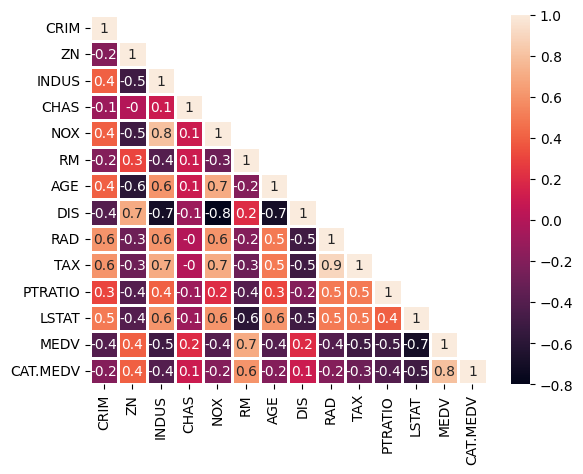

In [57]:
correlation_matrix = data.corr().round(1)

matrix = np.triu(np.ones_like(correlation_matrix),1)

sns.heatmap(correlation_matrix, annot=True, mask=matrix, linewidths=0.9)
plt.show()

In [58]:
y = data['CAT.MEDV']
#X = data.drop(['CAT.MEDV','MEDV'],axis=1)
X = data.drop(['CAT.MEDV','MEDV'],axis=1)

In [59]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=69)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:284
Size of validation set:95
Size of test set:127


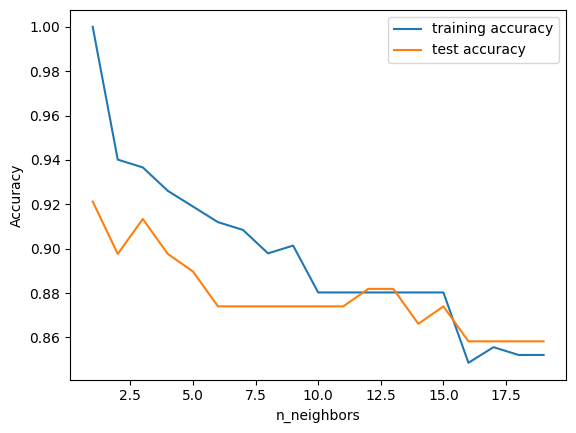

In [60]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [61]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
loo = LeaveOneOut()

clf = KNeighborsClassifier()

scores = cross_val_score(clf, X, y, cv=loo)

print("Mean accuracy: {:.2f}".format(scores.mean()))


Mean accuracy: 0.89


In [62]:
from sklearn.model_selection import cross_val_score
best_score = 0
for num_neighbors in range(1,15):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform cross validation
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=5)
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 3
Best average score: 0.8813333333333333
Score on training/validation set: 0.9393139841688655
Score on test set: 0.9291338582677166


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# Fix the parameter space
parameters = {'n_neighbors': range(1,15)}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)
grid_search.fit(X_train, y_train)
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))

Test score: 0.93
Best parameter: {'n_neighbors': 3}
Best cross-validation score: 0.8813333333333333
Best estimator: KNeighborsClassifier(n_neighbors=3)


In [73]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_trainval, y_trainval)

print("Score on training/validation set: {}".format(xgb.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(xgb.score(X_test, y_test)))

y.value_counts()

Score on training/validation set: 0.9973614775725593
Score on test set: 0.968503937007874


0    422
1     84
Name: CAT.MEDV, dtype: int64